Jeremy Howard tweeted:
>  @GoogleColab now supports the fastai library directly :D That means you can run all the lessons at http://course.fast.ai , and do your own research and development with fastai, all for free.

[To get started with colab](https://course.fast.ai/start_colab.html)

Check related library is installed or not

In [ ]:
! conda list | less

In [1]:
!conda list | grep scikit-learn

scikit-learn              0.21.3           py37hd81dba3_0  


In [2]:
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]), array([0, 0, 0, 1, 1]))

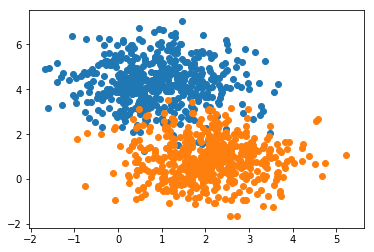

In [12]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

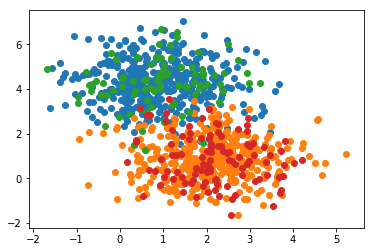

In [15]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [17]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

Test accuracy: 0.8850


In [ ]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

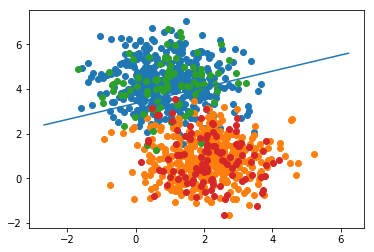

In [18]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1,  400)
y_bnd = - x_bnd * (theta[0] /theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)